# Exercise 1: Breast Cancer Data (Binary)

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

<AxesSubplot:>

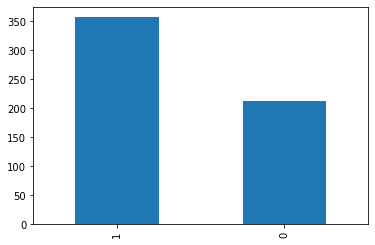

In [36]:
# Breast cancer data
from sklearn.datasets import load_breast_cancer

# Load data
dataObj = load_breast_cancer()
X = dataObj.data
y = dataObj.target
df = pd.DataFrame(data=X, columns=dataObj.feature_names)
df.insert(loc=0, column='class', value=y)

df['class'].value_counts().plot(kind='bar')

<AxesSubplot:>

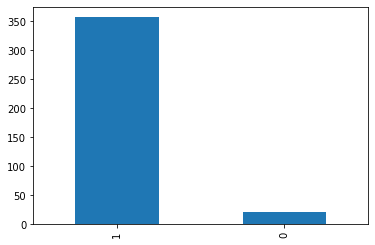

In [37]:
# Let make an imbalance dataset by sample small amount of class 0 (having cancer)
df0 = df[df['class'] == 0].sample(frac=0.10, random_state=1)
df1 = df[df['class'] == 1]
dfSample = pd.concat([df0, df1], axis=0, ignore_index=True)
dfSample['class'].value_counts().plot(kind='bar')

In [38]:
colsX = [i for i in dfSample.columns if i != 'class']
X = dfSample[colsX].values
y = dfSample['class'].values

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.20,
    stratify=y,
    random_state=1)

# Constructing a pipeline object
pipe_svc = Pipeline([('scl', StandardScaler()),
            ('clf', SVC(random_state=1))])

# Training
pipe_svc.fit(X_train, y_train)

# Prediction from test data
y_pred = pipe_svc.predict(X_test)

## Visualize confusion matrix

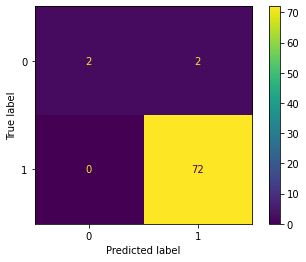

In [39]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(estimator=pipe_svc, X=X_test, y_true=y_test, labels=[0,1])  
plt.show()

## Calculate metrices
- Accuracy
- Precision
- Recall
- F1

In [40]:
from sklearn.metrics import accuracy_score, precision_score ,recall_score, f1_score

# Accuracy
ACC = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"Accuracy:{ACC:6.3f}")

# Precision
PRE = precision_score(y_true=y_test, y_pred=y_pred, pos_label=0)
print(f"Precision:{PRE:6.3f}")

# Recall
REC = recall_score(y_true=y_test, y_pred=y_pred, pos_label=0)
print(f"Recall:{REC:6.3f}")

# F1
F1 = f1_score(y_true=y_test, y_pred=y_pred, pos_label=0)
print(f"F1:{REC:6.3f}")

Accuracy: 0.974
Precision: 1.000
Recall: 0.500
F1: 0.500


## Perform gridsearch on `recall`

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

c_gamma_range = [0.01, 0.1, 1.0, 10.0]
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
set1 = {'clf__C': param_range, 'clf__kernel': ['linear']}
set2 = {'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['rbf']}
param_grid = [set1, set2]

# Making scorer wrapper so that we can pass the desired argument.
scorer = make_scorer(recall_score, pos_label=0)

# Grid search.
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  # Use scorer here
                  scoring=scorer,
                  cv=10,
                  n_jobs=-1)
                  
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9
{'clf__C': 1.0, 'clf__kernel': 'linear'}


## Re-evaluate the metrices

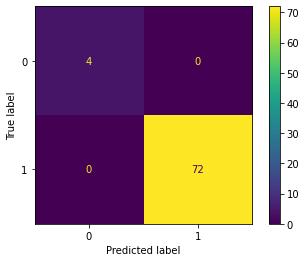

Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1: 1.000


In [42]:
y_pred = gs.predict(X_test)

# Visualization
plot_confusion_matrix(estimator=gs, X=X_test, y_true=y_test, labels=[0,1])  
plt.show()

# Accuracy
ACC = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"Accuracy:{ACC:6.3f}")

# Precision
PRE = precision_score(y_true=y_test, y_pred=y_pred, pos_label=0)
print(f"Precision:{PRE:6.3f}")

# Recall
REC = recall_score(y_true=y_test, y_pred=y_pred, pos_label=0)
print(f"Recall:{REC:6.3f}")

# F1
F1 = f1_score(y_true=y_test, y_pred=y_pred, pos_label=0)
print(f"F1:{REC:6.3f}")

## Use `class_weight` option

In [43]:
# Constructing a pipeline object
pipe_svc_balanced = Pipeline([('scl', StandardScaler()),
            ('clf', SVC(random_state=1, class_weight='balanced'))])

# Training
pipe_svc_balanced.fit(X_train, y_train)

# Prediction from test data
y_pred = pipe_svc_balanced.predict(X_test)

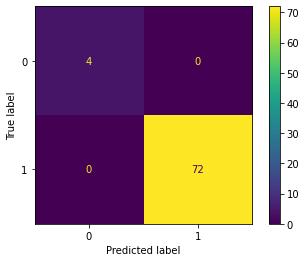

Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1: 1.000


In [44]:
# Visualization
plot_confusion_matrix(estimator=pipe_svc_balanced, X=X_test, y_true=y_test, labels=[0,1])  
plt.show()

# Accuracy
ACC = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"Accuracy:{ACC:6.3f}")

# Precision
PRE = precision_score(y_true=y_test, y_pred=y_pred, pos_label=0)
print(f"Precision:{PRE:6.3f}")

# Recall
REC = recall_score(y_true=y_test, y_pred=y_pred, pos_label=0)
print(f"Recall:{REC:6.3f}")

# F1
F1 = f1_score(y_true=y_test, y_pred=y_pred, pos_label=0)
print(f"F1:{REC:6.3f}")

## Use SMOTE 

In [45]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_os, y_train_os = oversample.fit_resample(X_train, y_train)
pd.Series(y_train_os).value_counts()

# Training
pipe_svc.fit(X_train_os, y_train_os)
# Prediction from test data
y_pred = pipe_svc.predict(X_test)

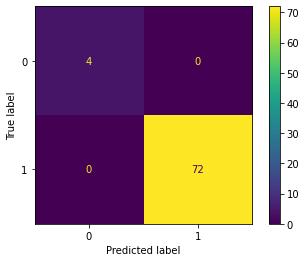

Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1: 1.000


In [46]:
# Visualization
plot_confusion_matrix(estimator=pipe_svc, X=X_test, y_true=y_test, labels=[0,1])  
plt.show()

# Accuracy
ACC = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"Accuracy:{ACC:6.3f}")

# Precision
PRE = precision_score(y_true=y_test, y_pred=y_pred, pos_label=0)
print(f"Precision:{PRE:6.3f}")

# Recall
REC = recall_score(y_true=y_test, y_pred=y_pred, pos_label=0)
print(f"Recall:{REC:6.3f}")

# F1
F1 = f1_score(y_true=y_test, y_pred=y_pred, pos_label=0)
print(f"F1:{REC:6.3f}")